In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [2]:
my_array = make_array(1,2,3)

In [3]:
sum(my_array > 1) 
# (0, 1, 1)



2

In [4]:
7.98 * 10

79.80000000000001

# Week 5: Lecture 9 ##

In [5]:
united = Table.read_table('data/united.csv')
united # flight info from Summer of 2015, from United Airlines
# questions - are flights late more often than they are on time?
united.sort('Delay', descending = True)

Date,Flight Number,Destination,Delay
6/21/15,1964,SEA,580
6/22/15,300,HNL,537
6/21/15,1149,IAD,508
6/20/15,353,ORD,505
8/23/15,1589,ORD,458
7/23/15,1960,LAX,438
6/23/15,1606,ORD,430
6/4/15,1743,LAX,408
6/17/15,1122,HNL,405
7/27/15,572,ORD,385


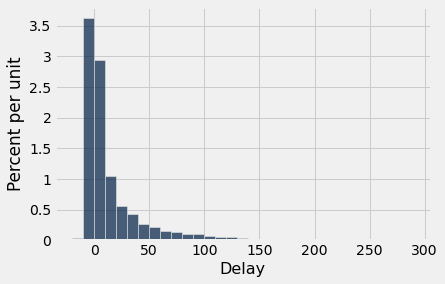

In [6]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [7]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)

population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [8]:
# 1 SD away from average
population_mean - population_sd, population_mean + population_sd

(-22.82204433623861, 56.13835536698002)

In [12]:
population_mean - population_sd <= delays

array([ True,  True,  True, ...,  True,  True,  True])

In [11]:
delays <= population_mean + population_sd

array([False,  True,  True, ...,  True,  True,  True])

In [13]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [14]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [15]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.697463
Population SD: 39.480199851609314
SD of sample means: 3.997559902444365


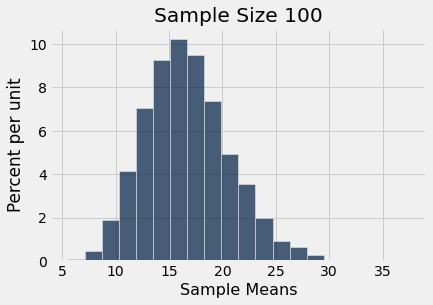

In [16]:
plot_sample_means(100)

In [21]:
39.480199851609314/3.997559902444365

9.876074609280673

In [22]:
sample_SD = 3.997559902444365

In [23]:
39.480199851609314/np.sqrt(100)

3.9480199851609314

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.68712475
Population SD: 39.480199851609314
SD of sample means: 1.961311546150289


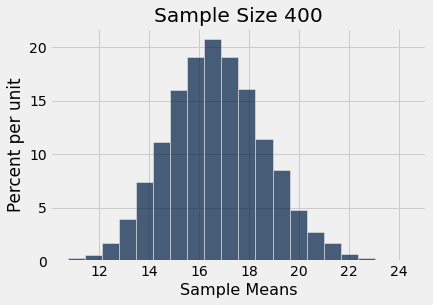

In [19]:
plot_sample_means(400)

Sample size:  900
Population mean: 16.658155515370705
Average of sample means:  16.655972444444448
Population SD: 39.480199851609314
SD of sample means: 1.3088448958014018


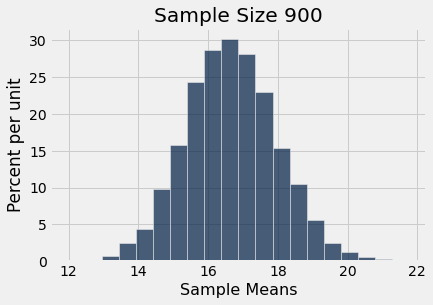

In [18]:
plot_sample_means(900)

In [ ]:
# what do you notice happens to our empirical distributions as we
# increase sample size?





## SD of the sample mean

In [20]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50) # (100, 150, 200, ...900)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [24]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.90104,3.94802
150,3.20991,3.22354
200,2.78288,2.79167
250,2.50235,2.49695
300,2.27574,2.27939
350,2.11101,2.11031
400,1.99137,1.97401
450,1.87956,1.86111
500,1.75339,1.76561
550,1.69648,1.68344


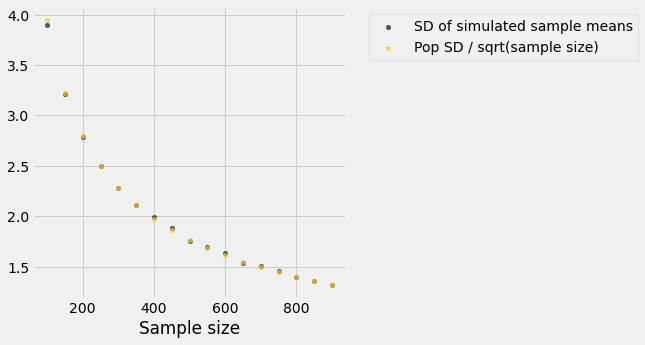

In [25]:
sd_table.scatter('Sample size')

## SD of 0/1 Population ##

In [26]:
# Population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
np.mean(zero_one_population)
#what does this number below mean?
#



0.2

In [28]:
np.std(zero_one_population)
# what does the number below mean, in regards to our average above?
# 




0.4000000000000001

In [ ]:
# Let's make a graph with proportion of ones on the x axis and SD on the y axis

In [29]:
def sd_of_zero_one_population(number_of_ones):
    """SD of a population with num_ones ones and (10 - num_ones) zeros"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [30]:
poss_ones = np.arange(11) # (0, 1....10)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 10
)
zero_one_pop

Number of ones,Proportion of ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [33]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)
zero_one_pop

Number of ones,Proportion of ones,SD
0,0,0
1,0.1,0.3
2,0.2,0.4
3,0.3,0.458258
4,0.4,0.489898
5,0.5,0.5
6,0.6,0.489898
7,0.7,0.458258
8,0.8,0.4
9,0.9,0.3


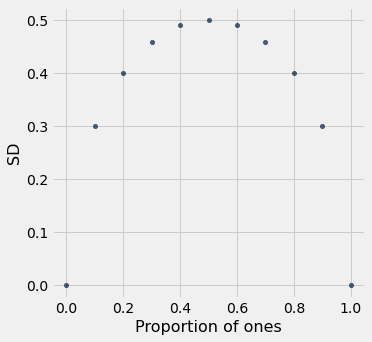

In [32]:
zero_one_pop.scatter('Proportion of ones', 'SD')